In [54]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
# import data as DataFrames and check their properties

In [33]:
fact_table = pd.read_csv('fact_table.csv')

In [ ]:
fact_table.info()

In [ ]:
fact_table.head()

In [18]:
trans = pd.read_csv('Trans_dim.csv')

In [ ]:
trans.head()

In [20]:
time_dim = pd.read_csv('time_dim.csv')

In [ ]:
time_dim.head()

In [24]:
store = pd.read_csv('store_dim.csv')

In [ ]:
store.head()

In [28]:
item = pd.read_csv('item_dim.csv', encoding='latin-1')

In [ ]:
item.head()

In [31]:
customer = pd.read_csv('customer_dim.csv', encoding='latin-1')

In [ ]:
customer.head()

In [ ]:
# merge tables with main (fact_table)

In [46]:
df = pd.merge(fact_table, time_dim, how='inner')

In [47]:
df = pd.merge(df, trans, how='inner')

In [48]:
df = pd.merge(df, store, how='inner')

In [49]:
df = pd.merge(df, item, how='inner')

In [50]:
df = pd.merge(df, customer, how='inner')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# check if duplicate values

In [57]:
df.drop_duplicates()

In [ ]:
# No duplicate values

In [ ]:
# Convert columns types whenever necessary

In [69]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# check for nulls

In [ ]:
df.isnull().sum()

In [ ]:
# Null values at columns 'unit' and 'name'. Null values at column 'item_name' we can convert by finding its description 
# by the corresponding 'item_key'. However 'name' is not important to convert because we also have 'customer_key' to separate 
# each customer. So we replace the Null values at column 'item_unit' and leave the 'name' column as it is.

In [ ]:
# Unit column

In [ ]:
df[df['unit'].isnull()].sort_values('item_key')

In [ ]:
item[item['item_key'] == 'I00158']

In [71]:
df['unit'].fillna('Frito Bold Flavors Variety', inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   payment_key    1000000 non-null  object        
 1   coustomer_key  1000000 non-null  object        
 2   time_key       1000000 non-null  object        
 3   item_key       1000000 non-null  object        
 4   store_key      1000000 non-null  object        
 5   quantity       1000000 non-null  int64         
 6   unit           1000000 non-null  object        
 7   unit_price     1000000 non-null  float64       
 8   total_price    1000000 non-null  float64       
 9   date           1000000 non-null  datetime64[ns]
 10  hour           1000000 non-null  int64         
 11  day            1000000 non-null  int64         
 12  week           1000000 non-null  object        
 13  month          1000000 non-null  int64         
 14  quarter        1000000 non-null  ob

In [79]:
df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,hour,day,week,month,quarter,year,trans_type,bank_name,division,district,upazila,item_name,desc,man_country,supplier,name,contact_no,nid
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,2016-04-26 17:13:00,17,26,4th Week,4,Q2,2016,card,Premier Bank Limited,DHAKA,JAMALPUR,ISLAMPUR,M&M Peanut Candy 1.7 oz,Food - Chocolate,Netherlands,Bolsius Boxmeer,priya,8801529462805,4543429591184
1,P001,C004510,T082988,I00062,S00428,11,cans,37.0,407.0,2018-11-05 07:18:00,7,11,2nd Week,5,Q2,2018,cash,None,CHITTAGONG,CHITTAGONG,ANOWARA,Red Bull 16oz,Beverage - Energy/Protein,Bangladesh,DENIMACH LTD,priya,8801529462805,4543429591184
2,P018,C004510,T074754,I00196,S00378,8,ct,16.0,128.0,2015-11-29 10:19:00,10,29,4th Week,11,Q4,2015,card,Mutual Trust Bank Limited,DHAKA,RAJBARI,KALUKHALI,Fiber One 90 Calorie Fudge Brownies,Food - Healthy,poland,CHROMADURLIN S.A.S,priya,8801529462805,4543429591184
3,P011,C004510,T06276,I00223,S00367,8,ct,13.5,108.0,2016-11-10 23:06:00,23,11,2nd Week,10,Q4,2016,card,Eastern Bank Limited,DHAKA,NETRAKONA,BARHATTA,Lance Variety Cracker Packs,Food - Snacks,Bangladesh,DENIMACH LTD,priya,8801529462805,4543429591184
4,P034,C004510,T08402,I00229,S00535,9,ct,13.0,117.0,2017-10-17 23:17:00,23,17,3rd Week,10,Q4,2017,card,United Commercial Bank Ltd,BARISAL,BHOLA,LALMOHAN,Kellogg's Cereals Assortment Pack,Food - Sweets,Germany,Friedola 1888 GmbH,priya,8801529462805,4543429591184


In [ ]:
# Top customers

In [ ]:
# Check each customer's contribution regarding the total revenue of the buisiness

In [289]:
customers = df[['coustomer_key', 'item_name','desc', 'unit', 'quantity', 'unit_price', 'total_price', 'division', 'district']]

In [290]:
top_customers = customers.groupby(['coustomer_key', 'division', 'district'])['total_price'].sum().sort_values(ascending=False).reset_index()

In [295]:
top_customers['%'] = ((top_customers['total_price']/ top_customers['total_price'].sum())*100).round(5)

In [299]:
top_customers.head(20)

,coustomer_key,division,district,total_price,%
0,C006691,DHAKA,DHAKA,5440.50,0.00516
1,C004222,DHAKA,DHAKA,5269.75,0.00500
2,C002859,DHAKA,DHAKA,5190.25,0.00492
3,C000758,DHAKA,DHAKA,5166.25,0.00490
4,C002919,DHAKA,DHAKA,5156.25,0.00489
5,C008213,DHAKA,DHAKA,5039.50,0.00478
6,C001289,DHAKA,DHAKA,4975.25,0.00472
7,C007924,DHAKA,DHAKA,4973.25,0.00472
8,C008607,DHAKA,DHAKA,4970.25,0.00472
9,C006300,DHAKA,DHAKA,4965.25,0.00471


In [ ]:
# Not any particular partterns from customer behaviour. Each of them has a small percentage at the overall sales. However top 20
# shows that consists of customers coming from Dhaka (country's capital), so that can be examined further.

In [ ]:
# Top selling products

In [ ]:
# Check for patterns in product categories. What catergories sell the most items and which of the has the top revenue. Do these 
# 2 match? If so, waht can be deduced

In [84]:
products = df[['item_name','desc', 'unit', 'quantity', 'unit_price', 'total_price']]

In [ ]:
products.head()

In [96]:
top_pr = products.groupby(['item_name', 'desc'])['quantity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
top_pr.head(10)

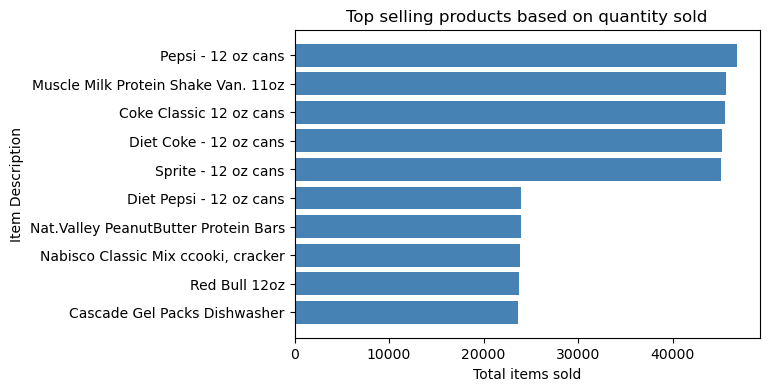

In [102]:
plt.figure(figsize=(6,4))

x = top_pr['quantity'].head(10)
y = top_pr['item_name'].head(10)

plt.barh(y,x, color='steelblue')
plt.xlabel('Total items sold')
plt.ylabel('Item Description')
plt.gca().invert_yaxis()
plt.title('Top selling products based on quantity sold')
plt.show()

In [98]:
top_pr_inc = products.groupby(['item_name', 'desc'])['total_price'].sum().sort_values(ascending=False).reset_index()

In [ ]:
top_pr_inc.head(10)

C:\Users\Apostolis Karapatis\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


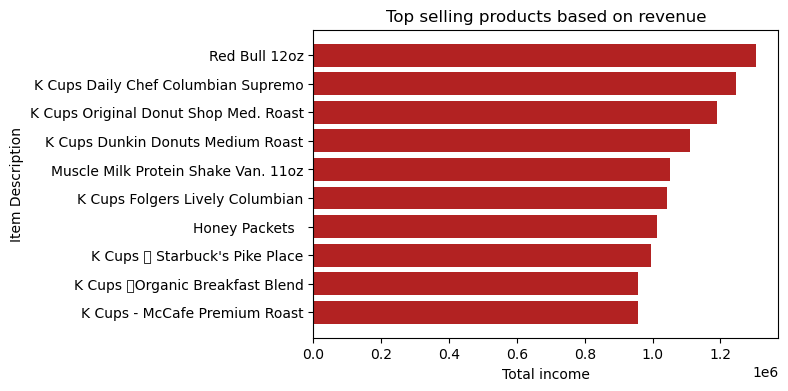

In [105]:
plt.figure(figsize=(6,4))

x = top_pr_inc['total_price'].head(10)
y = top_pr_inc['item_name'].head(10)

plt.barh(y,x, color='firebrick')
plt.xlabel('Total income')
plt.ylabel('Item Description')
plt.gca().invert_yaxis()
plt.title('Top selling products based on revenue')
plt.show()

In [108]:
top_cat_pr = products.groupby(['desc'])['total_price'].sum().sort_values(ascending=False).reset_index()

In [ ]:
top_cat_pr.head(10)

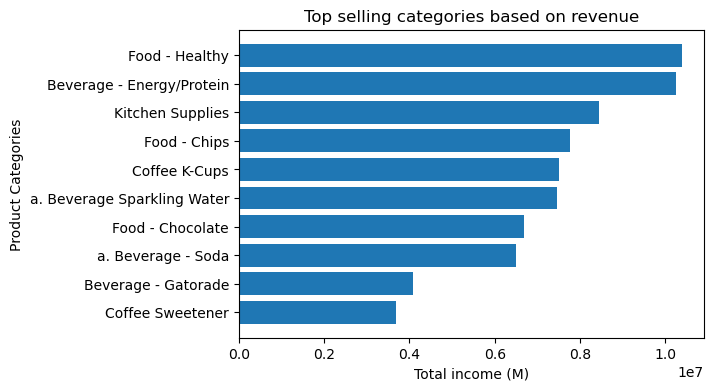

In [301]:
plt.figure(figsize=(6,4))

x = top_cat_pr['total_price'].head(10)
y = top_cat_pr['desc'].head(10)

plt.barh(y,x)
plt.xlabel('Total income (M)'
plt.ylabel('Product Categories')
plt.gca().invert_yaxis()
plt.title('Top selling categories based on revenue')
plt.show()

In [111]:
top_cat_qnt = products.groupby('desc')['quantity'].sum().sort_values(ascending=False).reset_index()

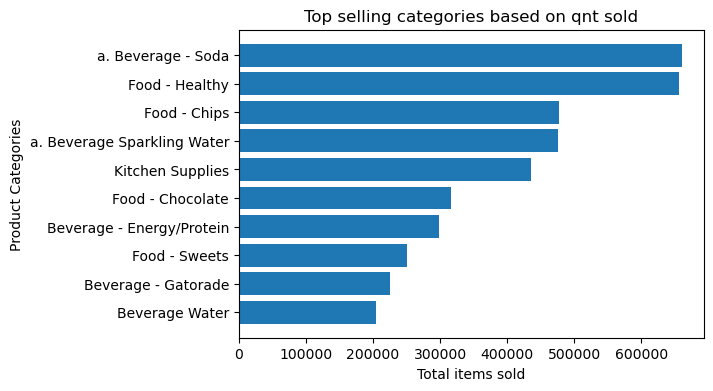

In [302]:
plt.figure(figsize=(6,4))

x = top_cat_qnt['quantity'].head(10)
y = top_cat_qnt['desc'].head(10)

plt.barh(y,x)
plt.xlabel('Total items sold')
plt.ylabel('Product Categories')
plt.gca().invert_yaxis()
plt.title('Top selling categories based on qnt sold')
plt.show()

In [ ]:
# Note: df1 is just as a safe meassure not to mess with the initial df

In [ ]:
df1 = df.copy()

In [ ]:
def categorize_description(description):
    if pd.isna(description):
        return 'Other'
    description = description.lower()
    if 'food' in description:
        return 'Food'
    elif 'coffee' in description:
        return 'Coffee'
    elif 'beverage' in description:
        return 'Beverage'
    elif 'dishware' in description:
        return 'Dishware'
    else:
        return description


df1['categories'] = df1['desc'].apply(categorize_description)


df1

In [ ]:
categ = df1.groupby('categories')['total_price'].sum().sort_values(ascending=False).reset_index()

In [ ]:
categ

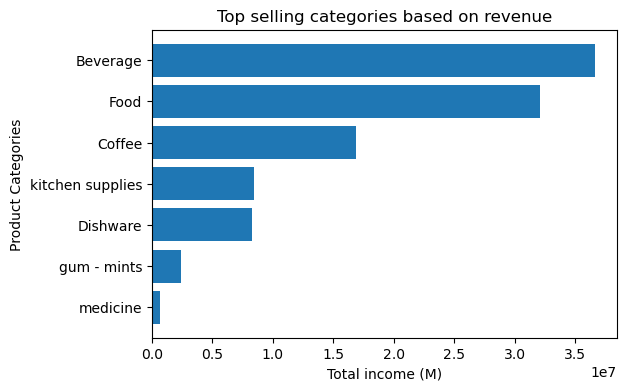

In [340]:
plt.figure(figsize=(6,4))

x = categ['total_price'].head(10)
y = categ['categories'].head(10)

plt.barh(y,x)
plt.xlabel('Total income (M)')
plt.ylabel('Product Categories')
plt.gca().invert_yaxis()
plt.title('Top selling categories based on revenue')
plt.show()

In [ ]:
categ_qnt = df1.groupby('categories')['quantity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
categ_qnt

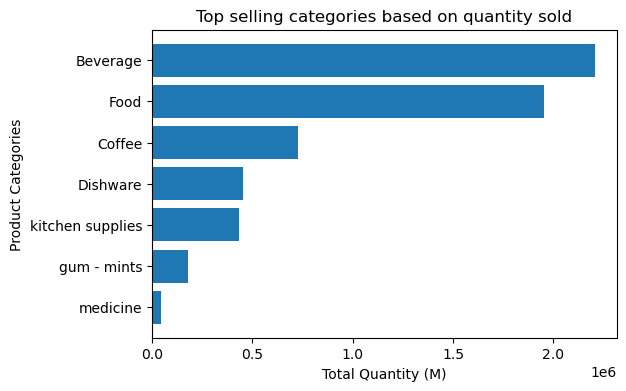

In [341]:
plt.figure(figsize=(6,4))

x = categ_qnt['quantity'].head(10)
y = categ_qnt['categories'].head(10)

plt.barh(y,x)
plt.xlabel('Total Quantity (M)')
plt.ylabel('Product Categories')
plt.gca().invert_yaxis()
plt.title('Top selling categories based on quantity sold')
plt.show()

In [ ]:
# Graphs about top selling items and their categories is incoclusive. We cannot deduce something just from these two. Interesting
# are the charts about product categories. Seems that product sales are stable regarding their different categories. There are no
# differences between products that sell the most and product categories that make the most revenue. This can be a nice 
# criteria to for inventory optimization and safety stock keeping for the products in top 3 categories, so that we never run out
# and create a gap in the market that a competitor can exploit

In [ ]:
# High selling regions

In [ ]:
# Check for patterns in sales revenue regarding customers' place of residence

In [113]:
regions = df[['item_name','desc', 'quantity', 'unit_price', 'total_price', 'division', 'district', 'upazila']]

In [114]:
regions.head()

,item_name,desc,quantity,unit_price,total_price,division,district,upazila
0,M&M Peanut Candy 1.7 oz,Food - Chocolate,1,35.0,35.0,DHAKA,JAMALPUR,ISLAMPUR
1,Red Bull 16oz,Beverage - Energy/Protein,11,37.0,407.0,CHITTAGONG,CHITTAGONG,ANOWARA
2,Fiber One 90 Calorie Fudge Brownies,Food - Healthy,8,16.0,128.0,DHAKA,RAJBARI,KALUKHALI
3,Lance Variety Cracker Packs,Food - Snacks,8,13.5,108.0,DHAKA,NETRAKONA,BARHATTA
4,Kellogg's Cereals Assortment Pack,Food - Sweets,9,13.0,117.0,BARISAL,BHOLA,LALMOHAN


In [ ]:
regions['district'].unique()

In [ ]:
regions['division'].unique()

In [115]:
top_div = regions.groupby('division')['total_price'].sum().sort_values(ascending=False).reset_index()

In [117]:
top_div

,division,total_price
0,DHAKA,40764619.75
1,CHITTAGONG,19763595.00
2,RAJSHAHI,12099196.00
3,KHULNA,11311610.50
4,RANGPUR,8429836.50
5,BARISAL,7520343.75
6,SYLHET,5512234.25


In [303]:
top_div['%'] = ((top_div['total_price']/ top_div['total_price'].sum())*100).round(2)

In [304]:
top_div

,division,total_price,%
0,DHAKA,40764619.75,38.68
1,CHITTAGONG,19763595.00,18.75
2,RAJSHAHI,12099196.00,11.48
3,KHULNA,11311610.50,10.73
4,RANGPUR,8429836.50,8.00
5,BARISAL,7520343.75,7.13
6,SYLHET,5512234.25,5.23


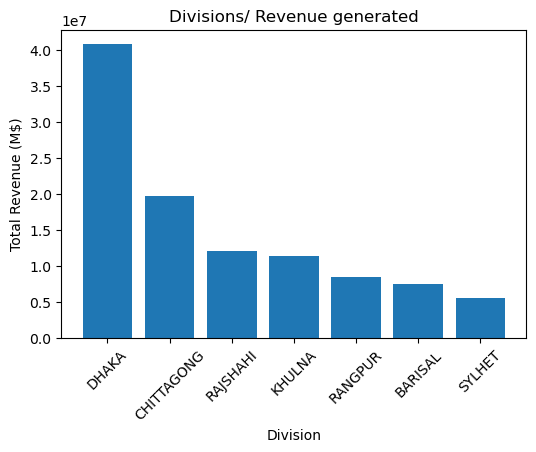

In [189]:
plt.figure(figsize=(6,4))

x = top_div['division'].head(10)
y = top_div['total_price'].head(10)

plt.bar(x,y)
plt.xlabel('Division')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue (M$)')
plt.title('Divisions/ Revenue generated')
plt.show()

In [ ]:
# Chart shows that almost 60% of total revenue comes just from 2 divisions (probably the wealthiest). So we can either apply 
# target marketing to these districts (also taking into account people special characteristics of these areas) to increase
# our sales, or we can give special discounts and offers at the customers of the lower revenue generating divisions to increase 
# revenue at these areas too.

In [305]:
top_dist = regions[regions['division'].isin(['CHITTAGONG', 'DHAKA'])].groupby(['division','district'])['total_price'].sum().sort_values(ascending=True).reset_index()

In [306]:
top_dist.head(10)

,division,district,total_price
0,DHAKA,MADARIPUR,601530.50
1,DHAKA,GAZIPUR,722286.25
2,CHITTAGONG,LAKSHMIPUR,729909.25
3,DHAKA,GOPALGANJ,731312.75
4,DHAKA,NARAYANGANJ,733546.50
5,DHAKA,SHERPUR,733712.00
6,DHAKA,RAJBARI,736393.00
7,CHITTAGONG,FENI,847873.50
8,DHAKA,SHARIATPUR,855565.75
9,DHAKA,MUNSHIGANJ,866631.25


In [307]:
low_dist = regions[regions['division'].isin(['BARISAL', 'SYLHET'])].groupby(['division','district'])['total_price'].sum().sort_values(ascending=True).reset_index()

In [308]:
low_dist.head(10)

,division,district,total_price
0,BARISAL,JHALOKATI,570807.25
1,BARISAL,BARGUNA,869041.00
2,BARISAL,BHOLA,1012205.75
3,BARISAL,PIROJPUR,1018423.00
4,SYLHET,MAULVIBAZAR,1036745.00
5,BARISAL,PATUAKHALI,1152629.00
6,SYLHET,HABIGANJ,1153998.00
7,SYLHET,SUNAMGANJ,1593774.00
8,SYLHET,SYLHET,1727717.25
9,BARISAL,BARISAL,2897237.75


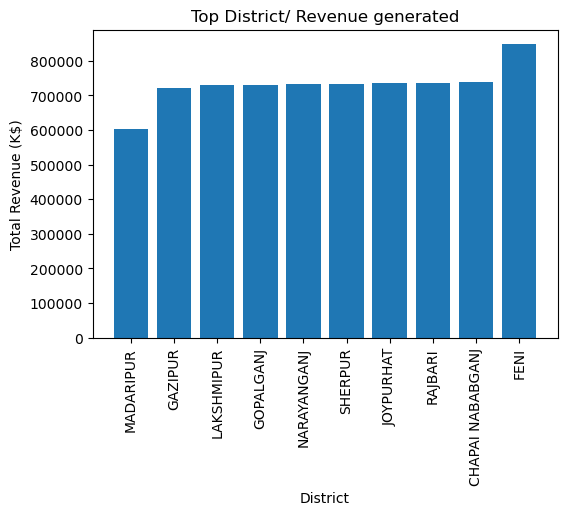

In [188]:
plt.figure(figsize=(6,4))

x = top_dist['district'].head(10)
y = top_dist['total_price'].head(10)

plt.bar(x,y)
plt.xlabel('District')
plt.xticks(rotation=90)
plt.ylabel('Total Revenue (K$)')
plt.title('Top District/ Revenue generated')
plt.show()

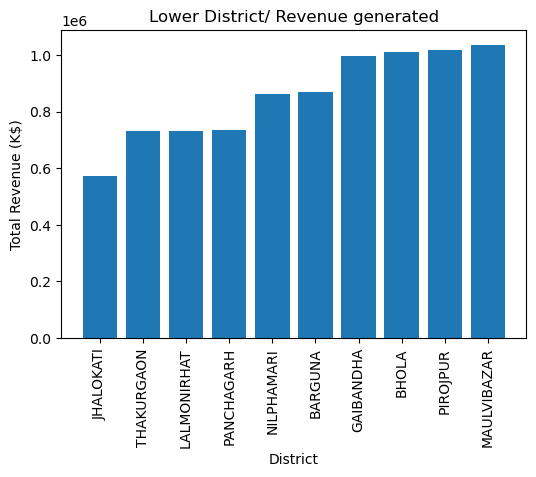

In [187]:
plt.figure(figsize=(6,4))

x = low_dist['district'].head(10)
y = low_dist['total_price'].head(10)

plt.bar(x,y)
plt.xlabel('District')
plt.xticks(rotation=90)
plt.ylabel('Total Revenue (K$)')
plt.title('Lower District/ Revenue generated')
plt.show()

In [ ]:
# Further analysis in the top 2 and bottom 2 divisions (llok into each division's districts) shows the revenue generated 
# from these particular areas, so marketing strategies and bonus offer/ discount at products can be given with higher accuracy
# regarding custmer habits, trends and lifestyle

In [ ]:
# Sales vs Time

In [ ]:
# Check how sales have progressed during the years

In [180]:
sales = df[['item_name', 'desc', 'quantity', 'unit_price', 'total_price', 'date', 'year', 'quarter', 'month', 'week', 'day', 'hour']]

In [ ]:
sales.head()

In [240]:
sales = sales[sales['year'] != 2021]

In [241]:
sales_per_year = sales.groupby('year')['total_price'].sum().reset_index()

In [242]:
sales_per_year

,year,total_price
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25


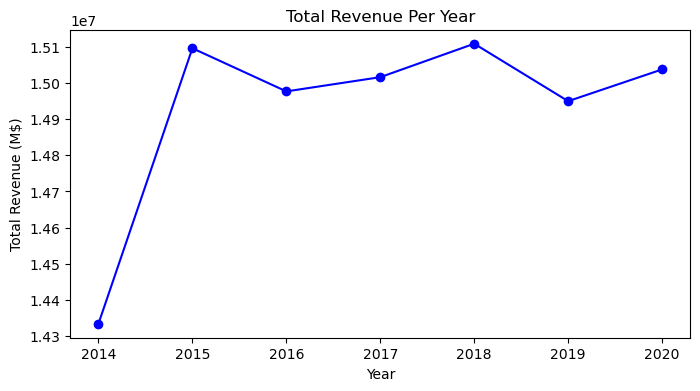

In [243]:
plt.figure(figsize=(8, 4))

x= sales_per_year['year']
y = sales_per_year['total_price']
plt.plot(x,y,marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Total Revenue (M$)')
plt.title('Total Revenue Per Year')

plt.show()

In [244]:
sales_per_year

,year,total_price
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25


In [251]:
sales_per_year['Difference%'] = (sales_per_year['total_price'].pct_change()*100).round(2)

In [246]:
sales_per_year

,year,total_price,Drop%
0,2014,14334731.25,NaN
1,2015,15095720.25,5.31
2,2016,14976508.25,-0.79
3,2017,15015806.00,0.26
4,2018,15108197.25,0.62
5,2019,14949510.25,-1.05
6,2020,15037190.25,0.59


In [247]:
regions1 = df[['item_name','desc', 'quantity', 'unit_price', 'total_price', 'division', 'district', 'upazila', 'year', 'month']]

In [248]:
div_drop = regions1.groupby('division')['total_price'].sum().sort_values(ascending=False).reset_index()

In [249]:
div_drop

,division,total_price
0,DHAKA,40764619.75
1,CHITTAGONG,19763595.00
2,RAJSHAHI,12099196.00
3,KHULNA,11311610.50
4,RANGPUR,8429836.50
5,BARISAL,7520343.75
6,SYLHET,5512234.25


In [253]:
seasonality = sales.groupby(['month', 'year'])['total_price'].sum().sort_values(ascending=False).reset_index()

In [256]:
seasonality.head(10)

,month,year,total_price
0,12,2020,1346884.75
1,5,2015,1345707.75
2,1,2019,1341867.00
3,5,2018,1331593.25
4,12,2018,1330733.00
5,7,2015,1328373.25
6,8,2017,1324086.75
7,10,2020,1319655.75
8,7,2014,1317296.00
9,5,2016,1313370.50


In [265]:
sales_month = sales.groupby('month')['total_price'].sum().sort_values(ascending=False).reset_index()

In [266]:
sales_month

,month,total_price
0,5,9078002.50
1,7,9046580.00
2,3,8939152.00
3,8,8929475.25
4,12,8923480.50
5,10,8902783.75
6,9,8724326.50
7,11,8680026.00
8,6,8556853.00
9,4,8504634.75


In [ ]:
# Chart above shows that sales had a small increase from 2014 to 2015 (~5% increase), and since then are pretty stable. Minor
# changes at the total sales over the years, so buisiness is doing pretty good regarding their customer loyalty and sales
# stability.

# Also from data it is obvious that there is no seasonality patterns in product sales. Customer engagement is year round. So 
# marketing campains during particular times of the year (e.g. Xmas holidays) are not necessary. Can't hurt either though.

In [ ]:
# Sales per transaction type

In [ ]:
# Check what king of transaction type customers preffer, and which banks choose for their transactions

In [263]:
transactions = df[['item_name','desc', 'quantity', 'unit_price', 'total_price', 'division', 'district', 'upazila', 'trans_type', 'bank_name']]

In [264]:
transactions

,item_name,desc,quantity,unit_price,total_price,division,district,upazila,trans_type,bank_name
0,M&M Peanut Candy 1.7 oz,Food - Chocolate,1,35.00,35.00,DHAKA,JAMALPUR,ISLAMPUR,card,Premier Bank Limited
1,Red Bull 16oz,Beverage - Energy/Protein,11,37.00,407.00,CHITTAGONG,CHITTAGONG,ANOWARA,cash,None
2,Fiber One 90 Calorie Fudge Brownies,Food - Healthy,8,16.00,128.00,DHAKA,RAJBARI,KALUKHALI,card,Mutual Trust Bank Limited
3,Lance Variety Cracker Packs,Food - Snacks,8,13.50,108.00,DHAKA,NETRAKONA,BARHATTA,card,Eastern Bank Limited
4,Kellogg's Cereals Assortment Pack,Food - Sweets,9,13.00,117.00,BARISAL,BHOLA,LALMOHAN,card,United Commercial Bank Ltd
...,...,...,...,...,...,...,...,...,...,...
999995,Welch's 100% Juice Variety10 oz,Beverage - Juice,8,17.00,136.00,DHAKA,DHAKA,PALLABI,card,United Commercial Bank Ltd
999996,Fresca Original - 12 oz cans,a. Beverage - Soda,1,6.75,6.75,DHAKA,DHAKA,GENDARIA,mobile,Bkash
999997,Fresca Original - 12 oz cans,a. Beverage - Soda,2,6.75,13.50,DHAKA,DHAKA,SAVAR,card,Eastern Bank Limited
999998,Strong Everyday Napkins,Kitchen Supplies,11,14.00,154.00,BARISAL,JHALOKATI,RAJAPUR,card,BRAC Bank Limited


In [268]:
transaction_type = transactions.groupby('trans_type')['total_price'].sum().sort_values(ascending=False).reset_index()

In [274]:
transaction_type['%'] = ((transaction_type['total_price']/ transaction_type['total_price'].sum())*100).round(2)

In [275]:
transaction_type

,trans_type,total_price,%
0,card,94583038.50,89.74
1,mobile,8109881.50,7.69
2,cash,2708515.75,2.57


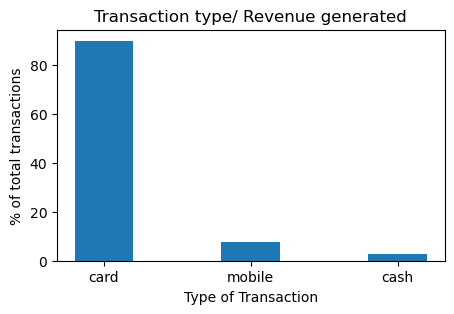

In [280]:
plt.figure(figsize=(5,3))

x = transaction_type['trans_type']
y = transaction_type['%']

plt.bar(x,y, width=0.4)
plt.xlabel('Type of Transaction')
plt.ylabel('% of total transactions')
plt.title('Transaction type/ Revenue generated')
plt.show()

In [282]:
banks = transactions[transactions['trans_type'] == 'card']

In [283]:
fav_bank = banks.groupby('bank_name')['total_price'].sum().sort_values(ascending=False).reset_index()

In [ ]:
fav_bank

In [285]:
fav_bank['%'] = ((fav_bank['total_price']/ fav_bank['total_price'].sum())*100).round(2)

In [286]:
fav_bank

,bank_name,total_price,%
0,Bangladesh Commerce Bank Limited,2730999.25,2.89
1,AB Bank Limited,2728515.50,2.88
2,Dhaka Bank Limited,2728366.00,2.88
3,South Bangla Agriculture and Commerce Bank Lim...,2728115.25,2.88
4,Standard Bank Limited,2727661.00,2.88
5,National Credit & Commerce Bank Limited,2723363.00,2.88
6,Citizens Bank Limited,2723215.25,2.88
7,Trust Bank Limited,2720807.00,2.88
8,Modhumoti Bank Limited,2715279.00,2.87
9,City Bank Limited,2713952.50,2.87


In [ ]:
# From bar chart above it is obvious (though expected) that customers preffer transactions via card (almost 90%) than any other 
# type. Regarding banks, from the total of 37 banks it seems that all of them have an equal part in the transaction pool (~2.8%)
# Since bank of prefference is not an issue we can start parterships with multiple banks to so we can offer our customers
# incentives or rewards if they use specific cards. This way it is possible that we can expand our audience even more.

In [ ]:
# Check for product supplier country/ location

In [343]:
x = df.groupby(['man_country', 'supplier'])['total_price'].sum().sort_values(ascending=False).reset_index()

In [344]:
x

,man_country,supplier,total_price
0,Bangladesh,DENIMACH LTD,13337300.50
1,India,Indo Count Industries Ltd,13159323.25
2,Lithuania,BIGSO AB,11746920.00
3,poland,CHROMADURLIN S.A.S,10976287.50
4,Germany,Friedola 1888 GmbH,10957102.25
5,Netherlands,Bolsius Boxmeer,10458204.00
6,United States,MAESA SAS,9892983.50
7,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,9463861.50
8,Finland,HARDFORD AB,9416792.25
9,China,"CHERRY GROUP CO.,LTD",5992661.00


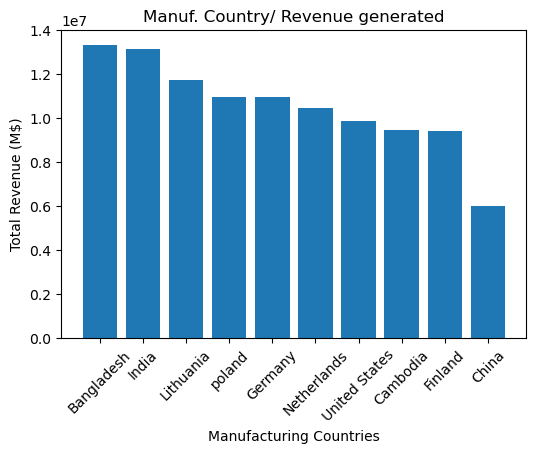

In [345]:
plt.figure(figsize=(6,4))

x1 = x['man_country']
y1 = x['total_price']

plt.bar(x1,y1)
plt.xlabel('Manufacturing Countries')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue (M$)')
plt.title('Manuf. Country/ Revenue generated')
plt.show()

In [ ]:
# Data shows that preffered suppliers come from Bangladesh (local supplier) or India (neighbouring country). For some particular
# and specialized products China & Finland are in play but with smaller percentages. Sticking to local or close proximity 
# suppliers can reduce shipping costs and time which can lead to potential increased profit margin.
# Also emphasising at local sourcing can appeal and attract consumers who value supporting local economies and sustainable 
# practices.